<a href="https://colab.research.google.com/github/Jtouloupis/CovidTweetsAnalyser/blob/main/Copy_of_TweetAnalyserV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
import nltk
import re
import string
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import random

#BERT
from transformers import get_linear_schedule_with_warmup, BertForSequenceClassification, BertTokenizer
from torch.utils.data import DataLoader, Dataset
from torch.nn import Dropout
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

print('Done')


Done


In [3]:
data = pd.read_csv('/content/tweets.csv',encoding='latin-1',header=0)


In [4]:
# Shuffle the rows using the sample function
df_shuffled = data.sample(frac=1)

# Reset the index of the shuffled DataFrame
data = df_shuffled.reset_index(drop=True)

In [5]:
data.describe()

,Type
count,5860.000000
mean,1.416041
std,0.810590
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [6]:
#Is there any other different value than neutral, negative and positive?
data['Type'].unique()

array([2, 0, 1])

In [7]:
#How's distributed the dataset? Is it biased?
data.groupby('Type').nunique()

,Tweets,Url
Type,,
0,1189,896
1,974,676
2,3647,240


In [8]:
#Let's keep only the columns that we're going to use
data = data[['Tweets','Type']]
data.head()


,Tweets,Type
0,The first drive-thru #coronavirus testing faci...,2
1,Study after study confirmed. New study (BC Can...,0
2,Realize that the job of @RonJohnsonWI is Homel...,2
3,FRANKIE BOYLE The whole (Covid) crisis does ra...,2
4,Unfortunately many people didnt wear masks whe...,0


In [9]:
#Is there any null value?
data["Tweets"].isnull().sum()

0

In [10]:
#Let's fill the only null value.
data["Tweets"].fillna("No content", inplace = True)

In [11]:
print(data)

                                                 Tweets  Type
0     The first drive-thru #coronavirus testing faci...     2
1     Study after study confirmed. New study (BC Can...     0
2     Realize that the job of @RonJohnsonWI is Homel...     2
3     FRANKIE BOYLE The whole (Covid) crisis does ra...     2
4     Unfortunately many people didnt wear masks whe...     0
...                                                 ...   ...
5855  I wonder...Do these "Stars" feel guilty for be...     1
5856  Ottawa records 1st case of coronavirus | CBC N...     2
5857  Coronavirus Is Very Different From the Spanish...     2
5858  Of course, I had to wear my \n@madamepremier\n...     0
5859  29% of Americans say they are shopping online ...     2

[5860 rows x 2 columns]


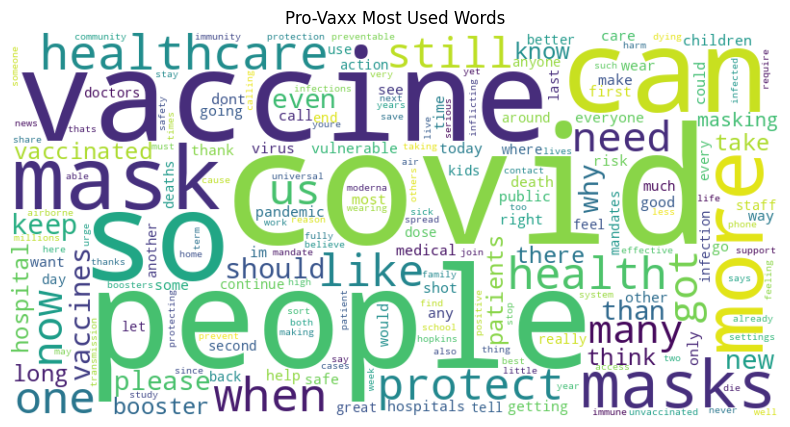

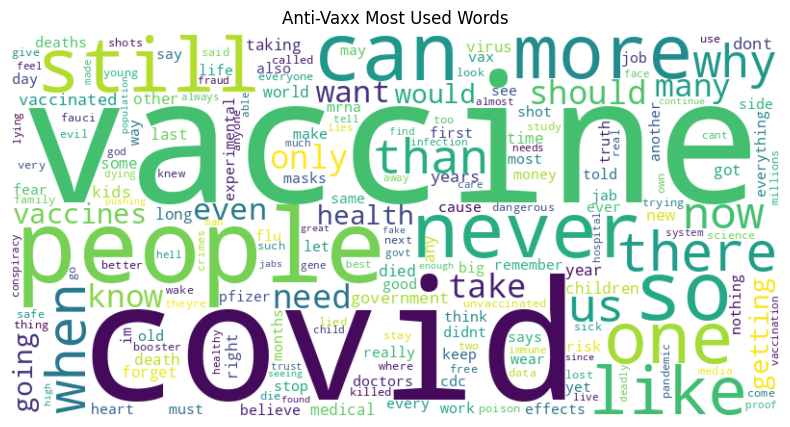

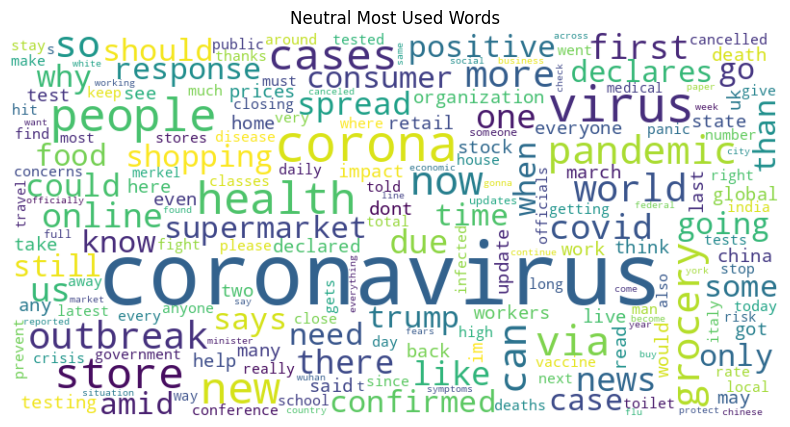

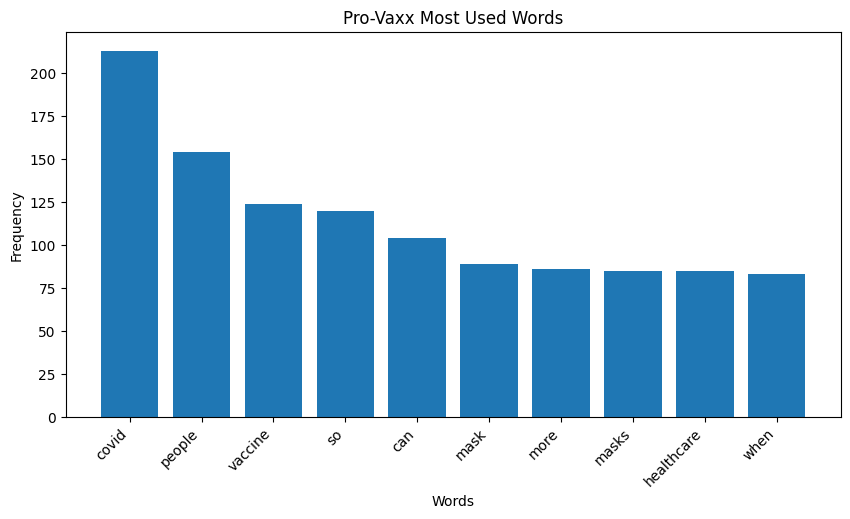

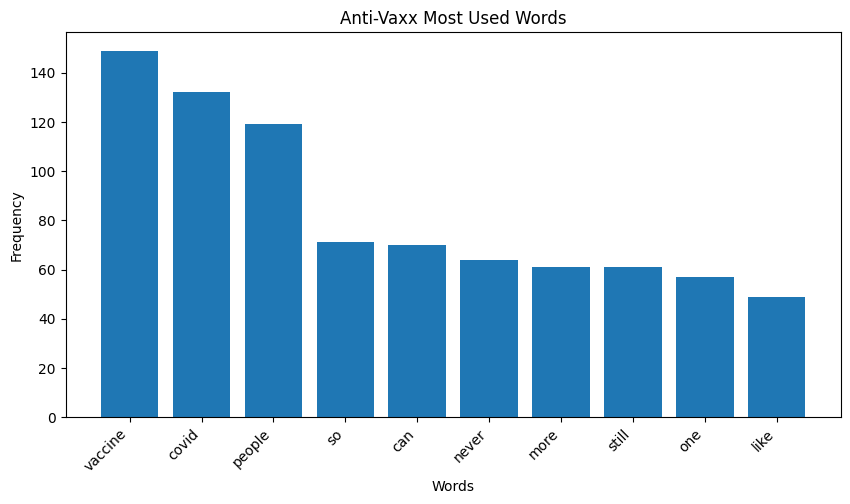

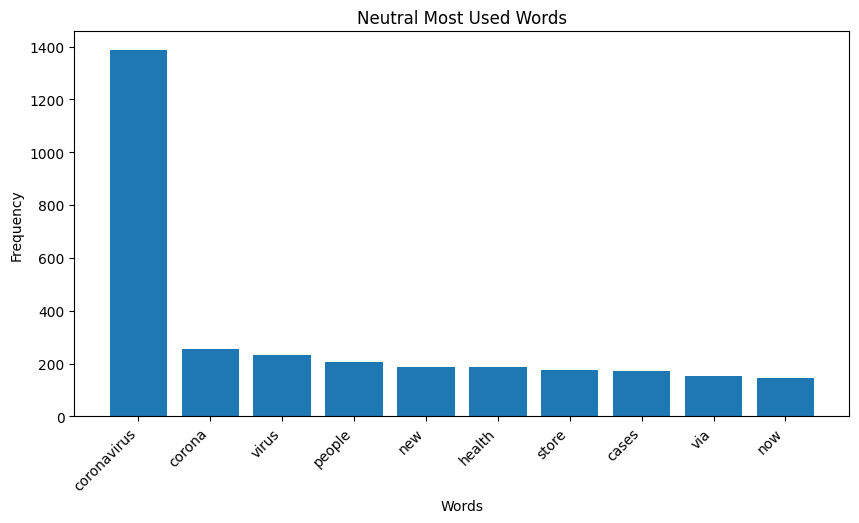

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# Define stopwords - common English words to ignore
stopwords = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'not' ,'will' ,'all' ,'how' , 'get', 'no', 'get', 'just'])

# Create dictionaries to store word frequencies for each category
pro_vax_words = Counter()
anti_vax_words = Counter()
neutral_words = Counter()

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize and convert to lowercase
    words = text.lower().split()
    # Remove stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stopwords]
    return words

# Iterate through the tweets and update word frequencies based on category
for index, row in data.iterrows():
    tweet_text = row['Tweets']
    words = preprocess_text(tweet_text)
    if row['Type'] == 0:
        pro_vax_words.update(words)
    elif row['Type'] == 1:
        anti_vax_words.update(words)
    elif row['Type'] == 2:
        neutral_words.update(words)

# Define a function to plot word frequencies
def plot_word_frequencies(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word frequencies for each category
plot_word_frequencies(pro_vax_words, "Pro-Vaxx Most Used Words")
plot_word_frequencies(anti_vax_words, "Anti-Vaxx Most Used Words")
plot_word_frequencies(neutral_words, "Neutral Most Used Words")


# Function to plot word frequencies as a bar chart
def plot_word_frequencies_bar(word_counts, title):
    common_words = word_counts.most_common(10)  # Get the top 10 most common words
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot word frequencies for each category as bar charts
plot_word_frequencies_bar(pro_vax_words, "Pro-Vaxx Most Used Words")
plot_word_frequencies_bar(anti_vax_words, "Anti-Vaxx Most Used Words")
plot_word_frequencies_bar(neutral_words, "Neutral Most Used Words")


In [13]:
# Load and preprocess the CSV file
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.max_length = max_length
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }



In [14]:
#Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
texts = data["Tweets"].tolist()
labels = data['Type'].tolist()

In [16]:
# Load and preprocess the CSV file
dataset = CustomDataset(texts, labels, tokenizer, max_length=128)


In [17]:

batch_size = 32
train_size = int(0.85 * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Freeze some layers
for param in model.bert.embeddings.parameters():
    param.requires_grad = False


In [18]:
#Fine-tune the BERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-5)

num_epochs = 7

# Learning rate scheduling
num_warmup_steps = 0
num_training_steps = num_epochs * len(train_dataloader)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Early stopping
best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

    # Calculate accuracy and average loss for the epoch
    accuracy = correct_predictions / total_predictions
    average_loss = total_loss / len(train_dataloader)

    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Training Accuracy: {accuracy:.4f}")
    print(f"  Training Average Loss: {average_loss:.4f}")

    # Learning rate scheduling step
    scheduler.step()


    # Early stopping check
    if average_loss < best_loss:
        best_loss = average_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping. Model training halted.")
            break

    # Batch Normalization
    class CustomBertForSequenceClassification(BertForSequenceClassification):
        def __init__(self, config):
            super(CustomBertForSequenceClassification, self).__init__(config)
            self.dropout = Dropout(config.hidden_dropout_prob)

    # Regularization (add this to your model definition)
   # model = CustomBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    # Confusion Matrix Analysis
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Ensure model is on the same device as the data
            model.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()
            _, predicted_labels = torch.max(logits, 1)
            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

        accuracy = correct_predictions / total_predictions
        average_loss = total_loss / len(test_dataloader)

        print(f"  Testing Accuracy: {accuracy:.4f}")
        print(f"  Testing Average Loss: {average_loss:.4f}")

# Use the fine-tuned model to make predictions
model.eval()

# Save the model
torch.save(model.state_dict(), 'bert_sentiment_model.pth')

Epoch 1/7: 100%|██████████| 156/156 [01:39<00:00,  1.56it/s]


Epoch 1/7:
  Training Accuracy: 0.7581
  Training Average Loss: 0.5674
  Testing Accuracy: 0.8521
  Testing Average Loss: 0.3580


Epoch 2/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 2/7:
  Training Accuracy: 0.8888
  Training Average Loss: 0.2931
  Testing Accuracy: 0.8965
  Testing Average Loss: 0.2787


Epoch 3/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 3/7:
  Training Accuracy: 0.9291
  Training Average Loss: 0.1985
  Testing Accuracy: 0.8999
  Testing Average Loss: 0.2572


Epoch 4/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 4/7:
  Training Accuracy: 0.9576
  Training Average Loss: 0.1366
  Testing Accuracy: 0.8987
  Testing Average Loss: 0.2660


Epoch 5/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 5/7:
  Training Accuracy: 0.9713
  Training Average Loss: 0.1010
  Testing Accuracy: 0.8976
  Testing Average Loss: 0.2735


Epoch 6/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 6/7:
  Training Accuracy: 0.9771
  Training Average Loss: 0.0829
  Testing Accuracy: 0.9033
  Testing Average Loss: 0.2670


Epoch 7/7: 100%|██████████| 156/156 [01:38<00:00,  1.58it/s]


Epoch 7/7:
  Training Accuracy: 0.9829
  Training Average Loss: 0.0723
  Testing Accuracy: 0.8999
  Testing Average Loss: 0.2675


In [19]:
# Load the saved model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.load_state_dict(torch.load('bert_sentiment_model.pth'))
model.to(device)
model.eval()

# Function to make predictions on new texts
def predict_sentiment(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_tensors='pt',
        truncation=True
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted_label = torch.max(logits, 1)

    return predicted_label.item()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# Example usage:

prediction1 = predict_sentiment("covid vaccine protected my elder family") #0
prediction2 = predict_sentiment("injuries are happening but they are not many in comparison with the long covid cases") #2
prediction3 = predict_sentiment("covid is a created virus that is going to controll us") #1
prediction4 = predict_sentiment("just wear a mask an protect the others") #0
prediction5 = predict_sentiment("On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.  Let me repeat this because it is hard to believe. According to WHO’s own data, more than 5,000,000 people are suspected to have been harmed by the COVID vaccines. The exact number today is 5,026,245 people, including tens of thousands of deaths.") #1
prediction6 = predict_sentiment("injecting children with an experimental gene therapy, silencing critics, and mask mandates. In addition, you have pronouns in your bio and called the Covid vaccines 'safe and effective'.You should keep your mouth shut!") #1
prediction7 = predict_sentiment("The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT") #1
prediction8 = predict_sentiment("Getting Covid is not a personal failing Getting long Covid is not a personal failing Being high risk for Covid is not a personal failing People have about as much control over this as their eye colour.So stop treating all of the above like it’s their fault") #0 / 2
prediction9 = predict_sentiment("Our Covid data project Is over, but the need for timely data is not.The John Hopkins Coronavirus Resource Centre.") #2
prediction10 = predict_sentiment("If you ate ants when you were a child, youre immune to the coronavirus")#2

print("Prediction 1:", prediction1)
print("Prediction 2:", prediction2)
print("Prediction 3:", prediction3)
print("Prediction 4:", prediction4)
print("Prediction 5:", prediction5)
print("Prediction 6:", prediction6)
print("Prediction 7:", prediction7)
print("Prediction 8:", prediction8)
print("Prediction 9:", prediction9)
print("Prediction 10:", prediction10)


Prediction 1: 0
Prediction 2: 0
Prediction 3: 1
Prediction 4: 0
Prediction 5: 1
Prediction 6: 0
Prediction 7: 1
Prediction 8: 0
Prediction 9: 2
Prediction 10: 2


In [21]:
#### LSTM ####


# Load data from CSV
data = pd.read_csv('/content/tweets.csv',encoding='latin-1',header=0)
# Shuffle the rows using the sample function
df_shuffled = data.sample(frac=1)

# Reset the index of the shuffled DataFrame
data = df_shuffled.reset_index(drop=True)

texts = data['Tweets'].tolist()
labels = data['Type'].tolist()

print(data)



                                                 Tweets  Type  \
0     Got my Moderna Jan no problems at all. And I h...     0   
1     Yes, exactly!\n#COVID19 #coronavirus https://t...     2   
2     10 deaths related to #coronavirus #COVID19 in ...     2   
3     Doctors who criticise vaccines or lockdown pol...     0   
4     Bethlehem responds to coronavirus the Palestin...     2   
...                                                 ...   ...   
5855  5 ways coronavirus is changing millennials' mo...     2   
5856                Pharmas holding the world at random     1   
5857  Coronavirus Covid-19: Two Heathrow baggage han...     2   
5858  As I start to finally fall out of my job, its ...     2   
5859   7 new cases in Indonesia: all imported \n\n[1...     2   

                                                    Url  
0                                                   NaN  
1                                                   NaN  
2                                            

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Activation, Dense


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

max_words = 5000
max_len = 200


# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have consistent length
X_train_padded = pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(sequences_test, maxlen=max_len, padding='post', truncating='post')

# Rest of your code remains the same
model = Sequential()
model.add(Embedding(max_words, 16, input_length=max_len))
model.add(Bidirectional(LSTM(20, dropout=0.3)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

history = model.fit(X_train_padded, np.array(y_train), epochs=25, validation_data=(X_test_padded, np.array(y_test)), callbacks=[checkpoint])


4688 1172 4688 1172
Epoch 1/25
147/147 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.6570
Epoch 1: val_accuracy improved from -inf to 0.74915, saving model to best_model.hdf5
147/147 [==============================] - 22s 102ms/step - loss: 0.7679 - accuracy: 0.6570 - val_loss: 0.6054 - val_accuracy: 0.7491
Epoch 2/25
147/147 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.7581
Epoch 2: val_accuracy improved from 0.74915 to 0.78157, saving model to best_model.hdf5
147/147 [==============================] - 5s 35ms/step - loss: 0.5233 - accuracy: 0.7581 - val_loss: 0.4956 - val_accuracy: 0.7816
Epoch 3/25
147/147 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.7892
Epoch 3: val_accuracy improved from 0.78157 to 0.78669, saving model to best_model.hdf5
147/147 [==============================] - 4s 29ms/step - loss: 0.4087 - accuracy: 0.7892 - val_loss: 0.4569 - val_accuracy: 0.7867
Epoch 4/25
147/147 [=============

In [23]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

# Function to preprocess and predict
def predict_class(text, model, tokenizer, max_len):
    # Tokenize and pad the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # Make predictions
    predictions = model.predict(padded_sequence)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    return predicted_class, predictions[0]

# Load the saved model
loaded_model = load_model('best_model.hdf5')


# Example usage
input_text = "covid is a created virus that is going to controll us" #1
text2 = "5000 are the new covid cases in greece for the week" #2
text3 = "covid-19 does not exist" #1
text4 = "just wear a mask an protect the others"#0
text5 = "injuries are happening but they are not many in comparison with the long covid cases" #2
text6 = "covid-19 is a bio weapon leaked from a lab" #1
text7 = "The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT"#1
text8 = "covid 19 is real"#0 / 2

predicted_class, probabilities = predict_class(input_text, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text2, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text3, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text4, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text5, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text6, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text7, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

predicted_class, probabilities = predict_class(text8, loaded_model, tokenizer, max_len)
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities}")

1/1 [==============================] - 1s 835ms/step
Predicted Class: 0
Class Probabilities: [0.45967132 0.2491201  0.2912086 ]
1/1 [==============================] - 0s 32ms/step
Predicted Class: 2
Class Probabilities: [0.43604532 0.10055485 0.46339983]
1/1 [==============================] - 0s 40ms/step
Predicted Class: 0
Class Probabilities: [0.4423686  0.17292576 0.38470566]
1/1 [==============================] - 0s 39ms/step
Predicted Class: 0
Class Probabilities: [0.8889368  0.10313237 0.00793079]
1/1 [==============================] - 0s 33ms/step
Predicted Class: 1
Class Probabilities: [0.12717764 0.8680344  0.00478794]
1/1 [==============================] - 0s 32ms/step
Predicted Class: 1
Class Probabilities: [0.23643343 0.60403615 0.15953043]
1/1 [==============================] - 0s 35ms/step
Predicted Class: 1
Class Probabilities: [8.2176598e-03 9.9133259e-01 4.4980584e-04]
1/1 [==============================] - 0s 39ms/step
Predicted Class: 2
Class Probabilities: [0.121484

In [24]:
print(labels)


[0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 

In [25]:
##from keras.layers import Embedding
#embedding_layer = Embedding(1000, 64)

In [26]:
sequence = tokenizer.texts_to_sequences(["vaccine injuries are happening"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

NameError: ignored

In [ ]:
sequence = tokenizer.texts_to_sequences(["injuries are happening but they are not many in comparison with the long covid cases"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["20 vaccine injuries and 1000 long covid patients were recorded for this month"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(['the covid vaccine protected my two sons'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["just wear a mask an protect the others"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid is a created virus that is going to controll us"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid-19 is a bio weapon leaked from a lab"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["Suzanne Gazda MD is a neurologist with 4,000 patients. The vast majority were advised to take the vaccine by other doctors. The vast majority of those got significantly worse after they took the COVID vaccine."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid-19 does not exist"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:

sequence = tokenizer.texts_to_sequences(["54 year old Canadian doctor Dr.Annie Rousseau died on April 21, 2023She was an internist & gastroenterologist in Saint-Jean-sur-Richelieu, Quebec.Fully COVID-19 mRNA vaccinated. Dead at 54.@CMA_Docsneeds to be sued by families of all dead MDs"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["My daughter has 3 more days of being a high school senior, 3 more days in an N99 in open air classrooms. Then shes on to online courses after graduation ceremony in June…shes 15 AND she wrote a book and watched family disappear due to her covid stance. Round of applause is ok."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.  Let me repeat this because it is hard to believe. According to WHO’s own data, more than 5,000,000 people are suspected to have been harmed by the COVID vaccines. The exact number today is 5,026,245 people, including tens of thousands of deaths."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]
#wrong

In [ ]:
sequence = tokenizer.texts_to_sequences(["My gawd 😭 I can’t believe they did this to people at funerals. NEVER FORGET how people were treating during “covid”Just found this post and it so heartbreaking"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["@RobertKennedyJrcalls out Bill Gates and the World Economic Forum saying they are exploiting climate change like they exploited Covid"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]   #wrong?

In [ ]:
sequence = tokenizer.texts_to_sequences(["Excuse me, Sir, but you've been in favor of lockdowns, injecting children with an experimental gene therapy, silencing critics, and mask mandates. In addition, you have pronouns in your bio and called the Covid vaccines 'safe and effective'.You should keep your mouth shut!"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["Getting Covid is not a personal failing Getting long Covid is not a personal failing Being high risk for Covid is not a personal failing People have about as much control over this as their eye colour.So stop treating all of the above like it’s their fault"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(["It's alright.The pandemic is over.People stopped dying of Covid when we stopped testing for Covid.And now they just die 'deaths not involving Covid' during waves of Covid."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]
#wrong

In [ ]:
sequence = tokenizer.texts_to_sequences(["Our Covid data project Is over, but the need for timely data is not.The John Hopkins Coronavirus Resource Centre."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]